In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
f = '/home/soontiensn/repos/drifters/drift-analysis/nancy/MEOPAR-TREX/MEOPAR_TREX_osker_20201028.csv'
d = pd.read_csv(f)
groups = d.groupby('Device')

In [3]:
for g in groups:
    print(g)

('1001 300434064148020',             ID  Message ID                Device                    Timestamp  \
182    4304077    62572195  1001 300434064148020  Sep 10 2020 05:01:46.001 PM   
186    4304088    62572928  1001 300434064148020  Sep 10 2020 05:10:12.001 PM   
202    4304125    62574866  1001 300434064148020  Sep 10 2020 05:20:11.001 PM   
214    4304181    62575299  1001 300434064148020  Sep 10 2020 05:31:02.001 PM   
224    4304182    62575299  1001 300434064148020  Sep 10 2020 05:40:11.001 PM   
...        ...         ...                   ...                          ...   
18193  4433224    65648502  1001 300434064148020   Oct 8 2020 12:02:24.001 PM   
18198  4433583    65658797  1001 300434064148020   Oct 8 2020 01:24:54.001 PM   
18211  4434278    65674044  1001 300434064148020   Oct 8 2020 04:16:46.001 PM   
18220  4434470    65679090  1001 300434064148020   Oct 8 2020 06:02:25.001 PM   
18224  4434648    65685145  1001 300434064148020   Oct 8 2020 07:00:36.001 PM   

  

In [4]:
lon_min=-69
lon_max=-57
lat_min=45
lat_max=51
mydevice='1010 300434064046920'

In [5]:
def plot_tracks(groups, ax):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, 2.),labels=[1,0,0,0])
    bmap.drawmeridians(np.arange(lon_min, lon_max,2.), labels=[0,0,0,1])
    bmap.drawcoastlines()
    for g, dg in groups:
        x,y = bmap(dg['Longitude'].values, dg['Latitude'].values)
        lw=1
        label='__nolabel__'
        color='C0'
        zorder=1
        if g == mydevice:
            lw=4
            label = "Trajectoire de l'objet récupéré"
            color='C1'
            zorder=10
        bmap.plot(x,y,linewidth=lw, label=label,color=color,zorder=zorder)
        bmap.plot(x[-1],y[-1],'o',color='C2',label='__nolabel__')
        bmap.plot(x[0],y[0],'o',color='C3',label='__nolabel__')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


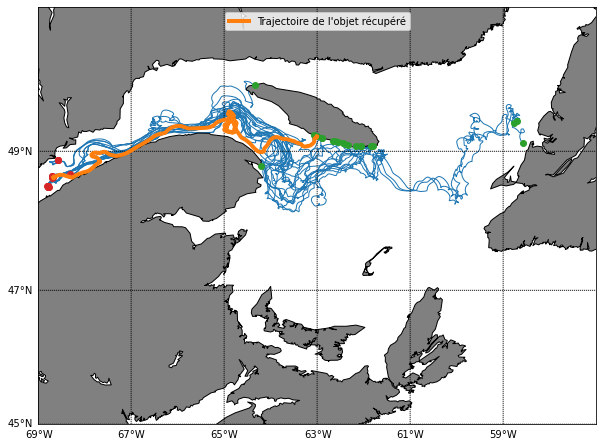

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_tracks(groups,ax)
ax.legend()

In [7]:
fig.savefig('AnitcostiRecovery.png', bbox_inches='tight')

In [14]:
for g, dg in groups:
    if g == mydevice:
        print(dg)

            ID  Message ID                Device                    Timestamp  \
18     4303411    62555035  1010 300434064046920  Sep 10 2020 12:15:09.001 PM   
20     4303415    62555845  1010 300434064046920  Sep 10 2020 12:20:12.001 PM   
24     4303420    62556168  1010 300434064046920  Sep 10 2020 12:25:12.001 PM   
28     4303428    62556357  1010 300434064046920  Sep 10 2020 12:30:12.001 PM   
30     4303437    62556488  1010 300434064046920  Sep 10 2020 12:37:25.001 PM   
...        ...         ...                   ...                          ...   
16816  4402057    64745423  1010 300434064046920   Oct 1 2020 09:00:36.001 AM   
16825  4402246    64750539  1010 300434064046920   Oct 1 2020 10:00:35.001 AM   
16845  4402520    64756453  1010 300434064046920   Oct 1 2020 11:00:09.001 AM   
16863  4402717    64760846  1010 300434064046920   Oct 1 2020 12:00:36.001 PM   
16883  4402981    64766205  1010 300434064046920   Oct 1 2020 01:00:12.001 PM   

        Latitude  Longitude